In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify
from SecretColors import Palette
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
init_notebook_mode(connected=True)

In [3]:
p = Palette() 
google = Palette("material")
r = '#E64A39'
g = '#65ED99'
b = '#5F8BE9'
y = '#EDD157'

In [4]:
train = pd.read_csv('train_new.csv', low_memory = False)

In [5]:
df = train

#### Convert Transaction Revenue into Millions

In [6]:
df['transactionRevenue'] /= 1e6

In [7]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,browserVersion,...,transactionRevenue,visits,adContent,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20170702,0025693546458698359,Not Socially Engaged,1498999998,5,1498999998,Safari,not available in demo dataset,not available in demo dataset,...,NaN,1,NaN,(not set),NaN,True,(not provided),organic,NaN,google
1,Organic Search,20170702,8622165649169477418,Not Socially Engaged,1499006908,1,1499006908,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20170702,2856336439798426805,Not Socially Engaged,1499047740,1,1499047740,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20170702,4203774291422453000,Not Socially Engaged,1499065071,1,1499065071,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
4,Organic Search,20170702,9372927630225043132,Not Socially Engaged,1499018422,1,1499018422,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


#### Extract weekday, year, and month from date

In [8]:
# Date format
def date_format(data):
    data['date'] = data['date'].astype("str")
    data['date'] = data['date'].apply(lambda x:x[:4] + "-" + x[4:6] + "-"+ x[6:] )
    data['date'] = pd.to_datetime(data['date'])
    data['weekday'] = data['date'].dt.weekday
    data['day'] = data['date'].dt.day
    data['year'] = data['date'].dt.year
    data['month']= data['date'].dt.month
    return data

In [9]:
df = date_format(df)

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = total/df.shape[0]
Null_df = pd.concat([total,percent],axis=1,keys=['total','percent'])
Null_df[:15]

,total,percent
campaignCode,903652,0.999999
adContent,892707,0.987887
transactionRevenue,892138,0.987257
keyword,661748,0.732303
isTrueDirect,629648,0.696781
referralPath,572712,0.633774
bounces,453023,0.501324
newVisits,200593,0.221980
pageviews,100,0.000111
mobileDeviceInfo,0,0.000000


In [12]:
def review(data):
    data['totals.newVisits'] = data['newVisits'].fillna(0)
    data['totals.bounces'] = data['bounces'].fillna(0)
    data['pageviews'] = data['pageviews'].fillna(0)
    #data['totals.pageviews'] = data['pageviews'].astype(int)
    #data['totals.newVisits'] = data['newVisits'].astype(int)
    #data['totals.bounces'] = data['bounces'].astype(int)
    return data

In [13]:
df = review(df)

In [14]:
def normalize(df):
    df['totals.hits'] = df['hits'].astype(float)
    df['totals.transactionRevenue'] = df['transactionRevenue'].astype(float)
    df['totals.transactionRevenue'].fillna(0.0,inplace =True)
    df['totals.transactionRevenue_log'] = (np.log(df[df["transactionRevenue"] > 0]["totals.transactionRevenue"]))
    df['totals.transactionRevenue_log'].fillna(0,inplace=True)
    return df

In [15]:
df = normalize(df)

Transaction Revenue

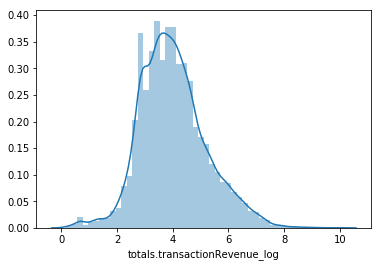

In [18]:
sns.distplot(df[df['totals.transactionRevenue_log'] > 0.0]['totals.transactionRevenue_log'])

Channeling Grouping

In [23]:
def barplot_percentage(count_feat, color1= 'rgb(55, 83, 109)', 
                       color2= 'rgb(26, 118, 255)',num_bars= None):

    train_channel = 100*df[count_feat].value_counts()/len(df)
    train_channel = train_channel.to_frame().reset_index()
    if num_bars:
        train_channel = train_channel.head(num_bars)
    trace0 = go.Bar(
        x=train_channel['index'],
        y=train_channel[count_feat],
        name='Train set',
        marker=dict(color=color1)
    )

    layout = go.Layout(
        title='{}'.format(count_feat),
        xaxis=dict(
            tickfont=dict(size=14, color='rgb(107, 107, 107)')
        ),
        yaxis=dict(
            title='Percentage of visits',
            titlefont=dict(size=16, color='rgb(107, 107, 107)'),
            tickfont=dict(size=14, color='rgb(107, 107, 107)')
        ),
        legend=dict(
            x=1.0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15,
        bargroupgap=0.1
    )

    fig = go.Figure(data=[trace0], layout=layout)
    iplot(fig)
barplot_percentage('channelGrouping')

Channel Grouping: Percentage of visits with revenue per channel

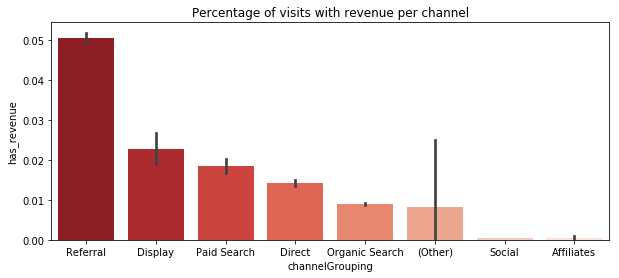

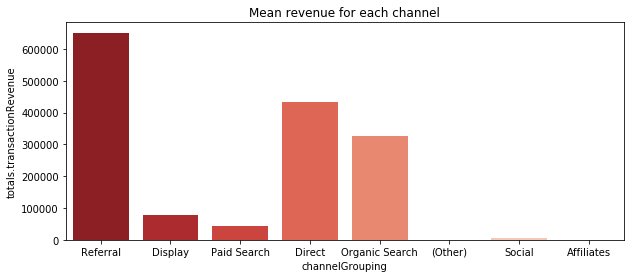

In [31]:
df['has_revenue'] = df['totals.transactionRevenue'].apply(lambda x: 1 if x > 0 else 0)
channel_order = ['Referral', 'Display', 'Paid Search', 'Direct', 'Organic Search', '(Other)', 'Social', 'Affiliates']
plt.figure(figsize=(10,4))
plt.title("Percentage of visits with revenue per channel")
sns.barplot(x='channelGrouping', y='has_revenue', data=df, order=channel_order, palette='Reds_r')
revenue_channel = df.groupby('channelGrouping')['totals.transactionRevenue'].sum()
revenue_channel = revenue_channel.to_frame().reset_index()
plt.figure(figsize=(10,4))
plt.title("Mean revenue for each channel")
ax = sns.barplot(x='channelGrouping', y='totals.transactionRevenue', data=revenue_channel, order=channel_order, palette='Reds_r')

Network Domain

In [33]:
barplot_percentage('networkDomain', num_bars= 10, 
                   color1='rgb(38, 115, 77)')

Hits and Pageview Distribution

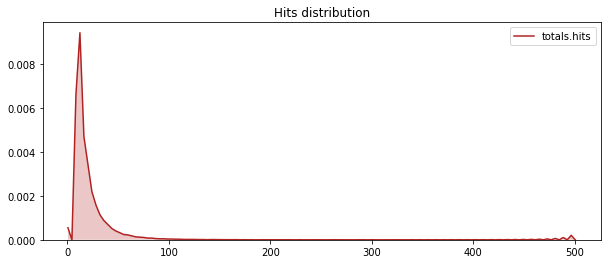

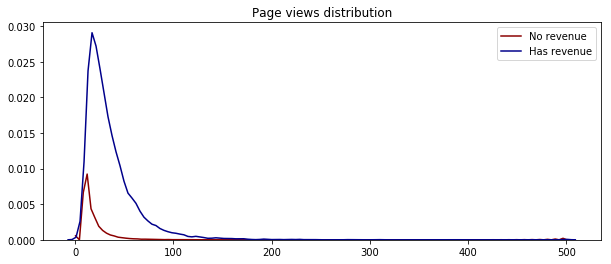

In [36]:
plt.figure(figsize=(10,4))
plt.title("Hits distribution")
ax1 = sns.kdeplot(df['totals.hits'].astype('float64'), color="firebrick", shade=True)
plt.figure(figsize=(10,4))
plt.title("Page views distribution")
ax2 = sns.kdeplot(train[train['has_revenue'] == 0]['hits'].astype('float64'),
                  label='No revenue', color="darkred")
ax2 = sns.kdeplot(train[train['has_revenue'] == 1]['hits'].astype('float64'),
                  label='Has revenue', color="darkblue")

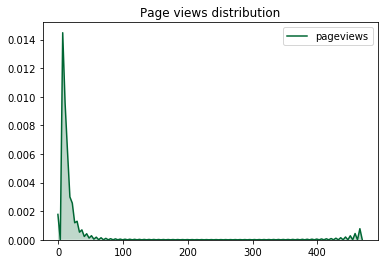

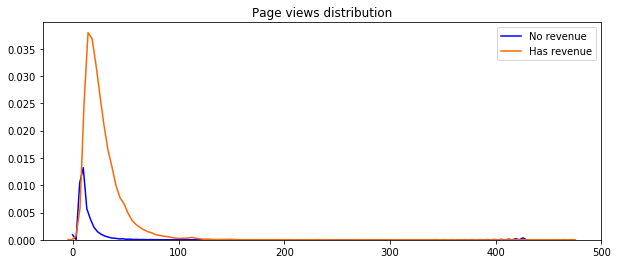

In [37]:
plt.title("Page views distribution")
ax3 = sns.kdeplot(df['pageviews'].dropna().astype('float64'), color="#006633", shade=True)
plt.figure(figsize=(10,4))

plt.title("Page views distribution")
ax4 = sns.kdeplot(train[train['has_revenue'] == 0]['pageviews'].dropna().astype('float64'),
                  label='No revenue', color="#0000ff")
ax4 = sns.kdeplot(train[train['has_revenue'] == 1]['pageviews'].dropna().astype('float64'),
                  label='Has revenue', color="#ff6600")

Browser Grouping

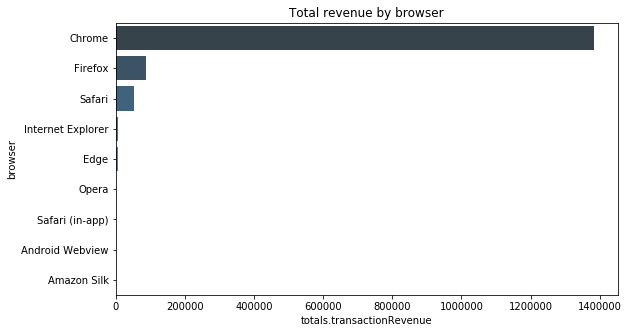

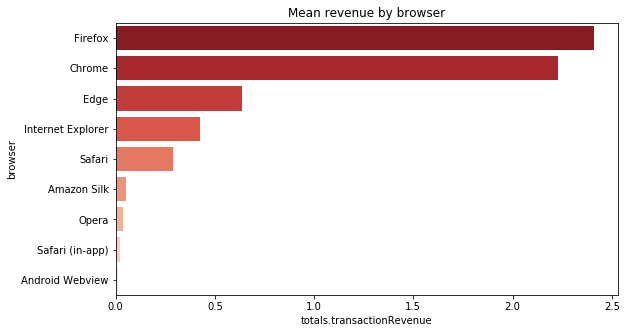

In [46]:
def group_revenue(group_col, title, sum_values=True, palette='Blues_d', size=(8,5)):
    if sum_values:
        tmp = df.groupby(group_col)['totals.transactionRevenue'].sum()
    else:
        tmp = df.groupby(group_col)['totals.transactionRevenue'].mean()
    tmp = tmp.to_frame().reset_index().sort_values('totals.transactionRevenue', ascending=False)
    tmp = tmp[tmp['totals.transactionRevenue'] > 0]
    plt.figure(figsize=size)
    plt.title(title)
    ax = sns.barplot(y=tmp[group_col], x= tmp['totals.transactionRevenue'], orient='h', palette=palette)
# Visits
barplot_percentage('browser', num_bars= 7)
# Revenue
group_revenue('browser', 'Total revenue by browser', True, size=(9,5))
group_revenue('browser', 'Mean revenue by browser', False, 'Reds_r',size=(9,5))

Device Category

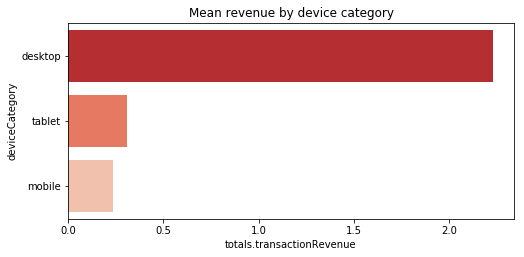

In [45]:
# Revenue
group_revenue('deviceCategory', 'Mean revenue by device category', False, 'Reds_r', size=(8, 3.6))

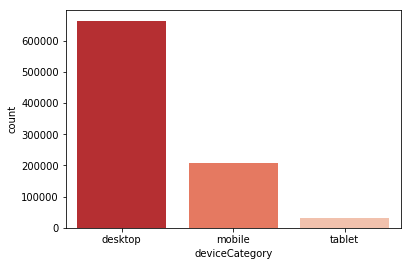

In [48]:
sns.countplot(df['deviceCategory'], palette= "Reds_r", alpha=1)

top device browsers:
Chrome               620364
Safari               182245
Firefox               37069
Internet Explorer     19375
Edge                  10205
Android Webview        7865
Safari (in-app)        6850
Name: browser, dtype: int64


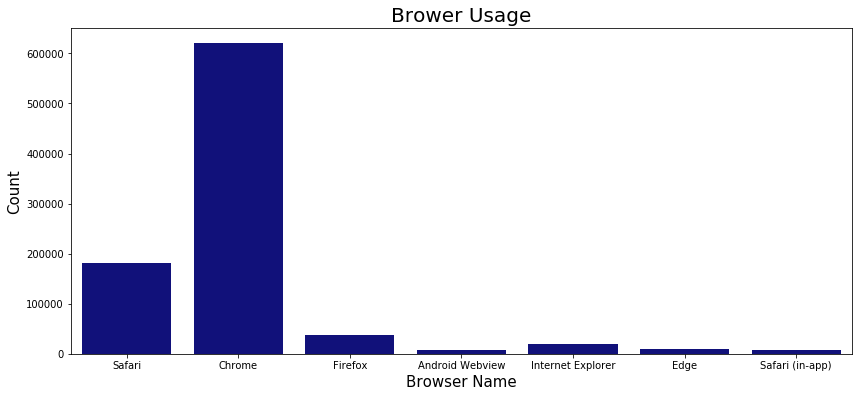

In [50]:
print("top device browsers:")
print(df['browser'].value_counts()[:7])
plt.figure(figsize=(14,6))
ax = sns.countplot(x='browser',data=df[df['browser'].isin(df['browser'].value_counts()[:7].index)],
                  color = 'darkblue',
                  alpha= 1)
ax.set_title("Brower Usage",fontsize= 20)
ax.set_xlabel("Browser Name",fontsize = 15)
ax.set_ylabel("Count",fontsize = 15)
plt.show()

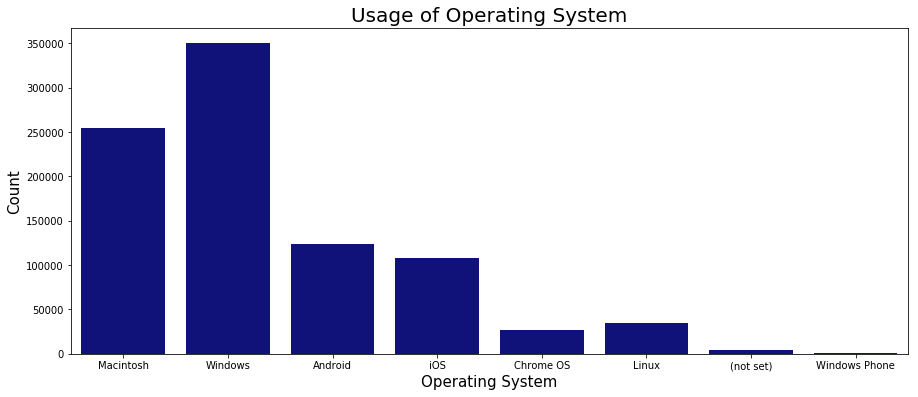

In [51]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='operatingSystem',data = df[df['operatingSystem'].isin(df['operatingSystem'].value_counts()[:8].index)], 
                  color = 'darkblue')
ax.set_title("Usage of Operating System",fontsize=20)
ax.set_xlabel("Operating System",fontsize = 15)
ax.set_ylabel("Count",fontsize = 15)
plt.show()

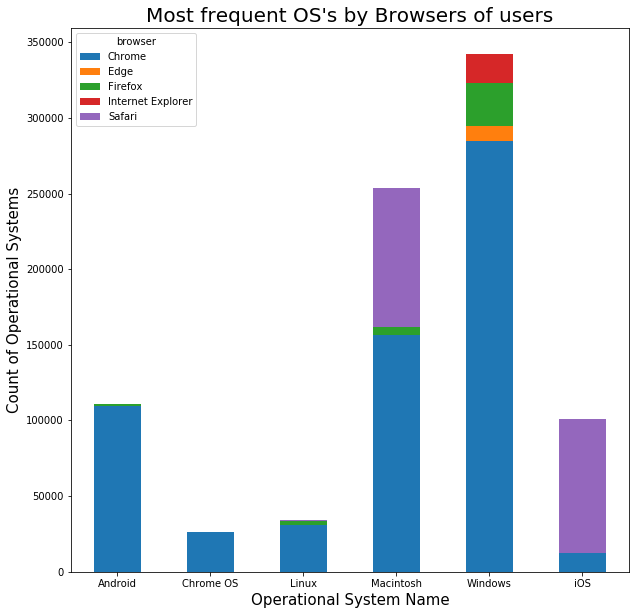

browser,Chrome,Edge,Firefox,Internet Explorer,Safari
operatingSystem,,,,,
Android,109843,0,1142,0,0
Chrome OS,26337,0,0,0,0
Linux,31079,0,2227,0,650
Macintosh,156201,0,5256,2,92166
Windows,284533,10144,28346,19095,25
iOS,12220,0,0,0,88492


In [53]:

crosstab_eda = pd.crosstab(index=df[df['operatingSystem'].isin(df['operatingSystem'].value_counts()[:6].index.values)]['operatingSystem'], 
                          columns=df[df['browser'].isin(df['browser'].value_counts()[:5].index.values)]['browser'])
crosstab_eda.plot(figsize=(10,10),kind='bar',stacked=True)
plt.title("Most frequent OS's by Browsers of users", fontsize = 20)
plt.xlabel("Operational System Name", fontsize=15)
plt.ylabel("Count of Operational Systems", fontsize=15)
plt.xticks(rotation=0)
plt.show()
crosstab_eda 

Revenue by Browsers

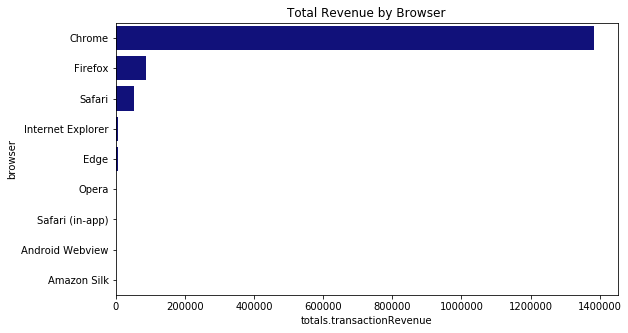

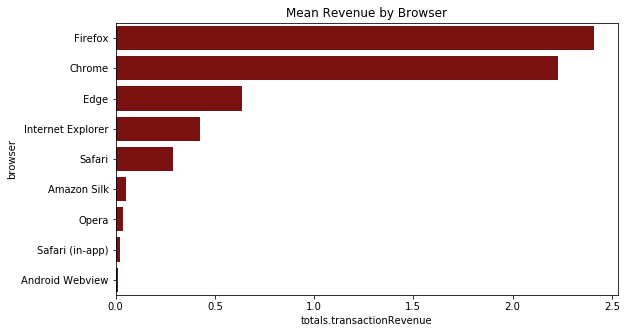

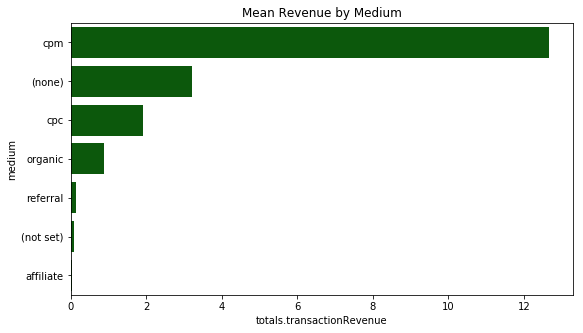

In [54]:
# Group and plot revenue
def group_revenue(group_col, title, sum_values=True, color = r, size=(8,5)):
    if sum_values:
        tmp = df.groupby(group_col)['totals.transactionRevenue'].sum()
    else:
        tmp = df.groupby(group_col)['totals.transactionRevenue'].mean()
    tmp = tmp.to_frame().reset_index().sort_values('totals.transactionRevenue', ascending=False)
    tmp = tmp[tmp['totals.transactionRevenue'] > 0]
    plt.figure(figsize=size)
    plt.title(title)
    ax = sns.barplot(y=tmp[group_col], x= tmp['totals.transactionRevenue'], orient='h', color = color)

# Revenue
group_revenue('browser', 'Total Revenue by Browser', True, 'darkblue', size=(9,5))
group_revenue('browser', 'Mean Revenue by Browser', False, 'darkred',size=(9,5))
group_revenue('medium', 'Mean Revenue by Medium', False, 'darkgreen',size=(9,5))


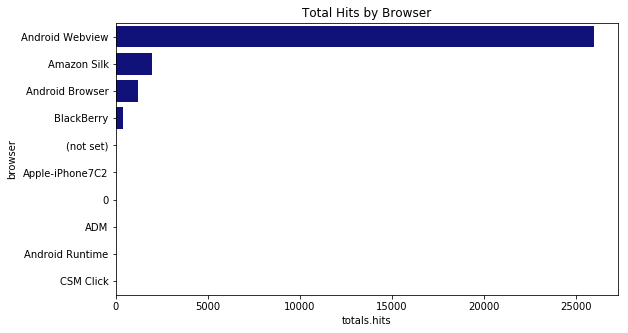

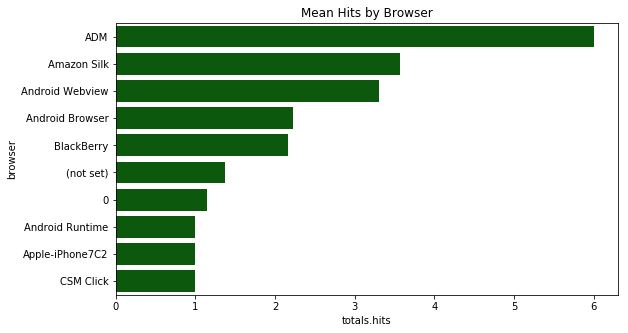

In [55]:
def group_hits(group_col, title, sum_values=True, color = r, size=(8,5)):
    if sum_values:
        tmp = df.groupby(group_col)['totals.hits'].sum()[:10]
    else:
        tmp = df.groupby(group_col)['totals.hits'].mean()[:10]
    tmp = tmp.to_frame().reset_index().sort_values('totals.hits', ascending=False)
    tmp = tmp[tmp['totals.hits'] > 0]
    plt.figure(figsize=size)
    plt.title(title)
    ax = sns.barplot(y=tmp[group_col], x= tmp['totals.hits'], orient='h', color = color)

group_hits('browser', 'Total Hits by Browser', True, 'darkblue', size=(9,5))
group_hits('browser', 'Mean Hits by Browser', False, 'darkgreen',size=(9,5))

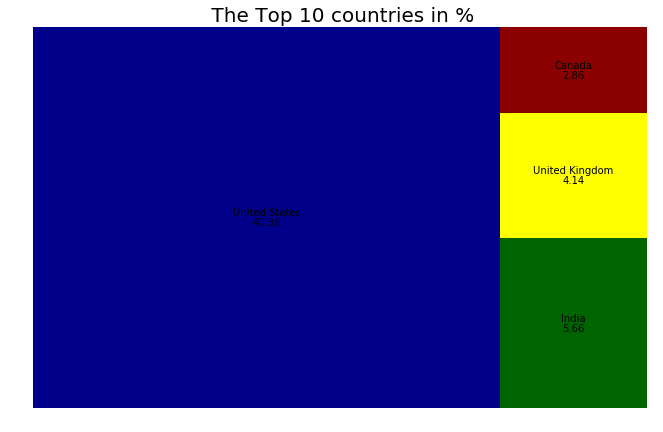

In [61]:
top_countries = round((df['country'].value_counts()[:4]/len(df['country']))*100,2)
plt.figure(figsize=(11,7))
squar = squarify.plot(sizes=top_countries.values, label=top_countries.index, 
                  value=top_countries.values, color = ['darkblue','darkgreen','yellow',
                                                       'darkred'],alpha=1)
squar.set_axis_off()
squar.set_title(" The Top 10 countries in %",fontsize=20)
plt.show()


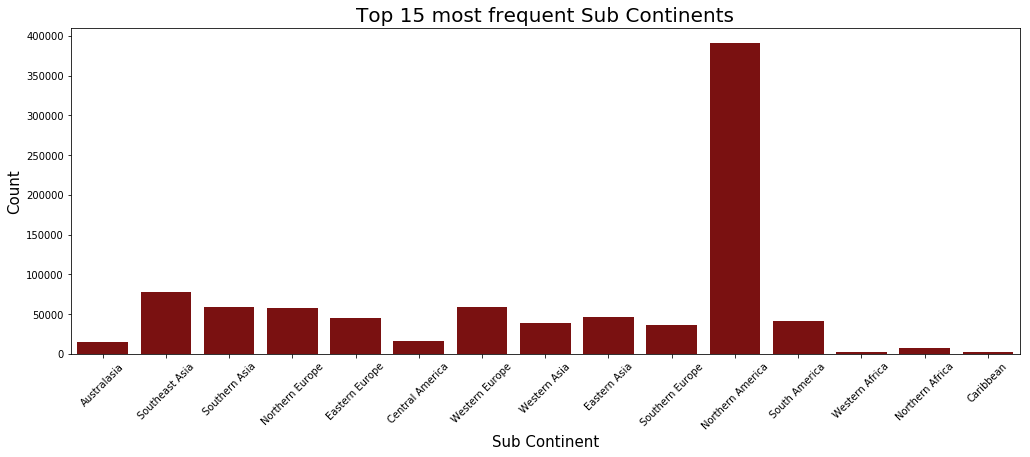

In [63]:
plt.figure(figsize=(17,6))
ax = sns.countplot(x = 'subContinent' , data = df[df['subContinent'].isin(df['subContinent'].value_counts()[:15].index)],color = 'darkred')
ax.set_title("Top 15 most frequent Sub Continents" , fontsize=20)
ax.set_xlabel("Sub Continent" , fontsize = 15)
ax.set_ylabel("Count" ,fontsize = 15)
plt.xticks(rotation=45)
plt.show()

In [80]:
print("Top revenue generator countries")
((df[df['totals.transactionRevenue'] > 0].groupby(['country'])[['totals.transactionRevenue_log']].sum()).sort_values(by='totals.transactionRevenue_log',ascending=False)[:10])


Top revenue generator countries


,totals.transactionRevenue_log
country,
United States,43819.417983
Canada,765.116526
Venezuela,310.478543
Mexico,79.554587
Taiwan,78.955280
Japan,75.063390
United Kingdom,64.807313
Australia,56.181139
Indonesia,53.773020


Searches, visits, medium, keyword

In [81]:
def plotbar(df, col, title, top=None):
    frame = pd.DataFrame()
    frame['totals.transactionRevenue'] = df['totals.transactionRevenue'].copy()
    frame[col] = df[col].fillna('missing')
    # Percentage of revenue
    tmp_rev = frame.groupby(col)['totals.transactionRevenue'].sum().to_frame().reset_index()
    tmp_rev = tmp_rev.sort_values('totals.transactionRevenue', ascending=False)
    tmp_rev = tmp_rev.rename({'totals.transactionRevenue': 'Revenue percentage'},axis=1)
    tmp_rev['Revenue percentage'] = 100*tmp_rev['Revenue percentage']/df['totals.transactionRevenue'].sum()
    # Percentage of visits
    tmp = frame[col].value_counts().to_frame().reset_index()
    tmp.sort_values(col, ascending=False)
    tmp = tmp.rename({'index': col, col: 'Percentage of Visits'},axis=1)
    tmp['Percentage of Visits'] = 100*tmp['Percentage of Visits']/len(df)
    tmp = pd.merge(tmp, tmp_rev, on=col, how='left')
    if top:
        tmp = tmp.head(top)
    # Barplot
    trace1 = go.Bar(x=tmp[col], y=tmp['Percentage of Visits'],
                    name='Visits', marker=dict(color='rgb(55, 83, 109)'))
    trace2 = go.Bar(x=tmp[col], y=tmp['Revenue percentage'],
                    name='Revenue', marker=dict(color='rgb(26, 118, 255)'))

    layout = go.Layout(
        barmode='group',
        title=title,
    )
    
    layout = go.Layout(
        title=title,
        xaxis=dict(tickfont=dict(size=14, color='rgb(107, 107, 107)')),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(size=16, color='rgb(107, 107, 107)'),
            tickfont=dict(size=14, color='rgb(107, 107, 107)')
        ),
        legend=dict(x=0.95, y=1.0, bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'),
        barmode='group',
        bargap=0.15,
        bargroupgap=0.1
    )
    
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    iplot(fig)
    
plotbar(train, 'medium', 'Train set - visits and revenue by medium')

In [82]:
plotbar(train[train['medium'] == 'referral'], 'source', 'Visits and revenue by source for Referral', top=8)

In [83]:
plotbar(train[train['medium'] == 'referral'], 'channelGrouping', 'Visits and revenue by channel for REFERRAL MEDIUM')

In [84]:
plotbar(train[train['medium'] == 'cpc'], 'source', 'Visits and revenue by source for CPC', top=None)

In [85]:
plotbar(train[train['medium'] == 'cpc'], 'campaign', 'Visits and revenue by campaign for CPC')

In [86]:
plotbar(train[train['medium'] == 'cpm'], 'source', 'Visits and revenue by source for CPM')

How did the user arrive at the store?

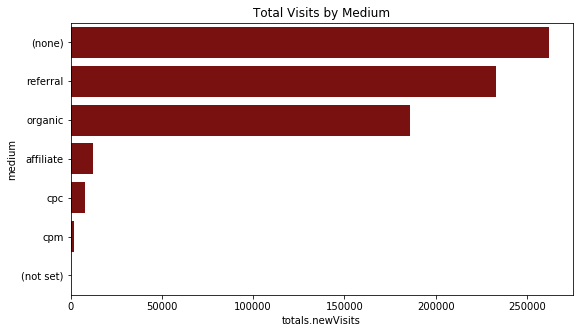

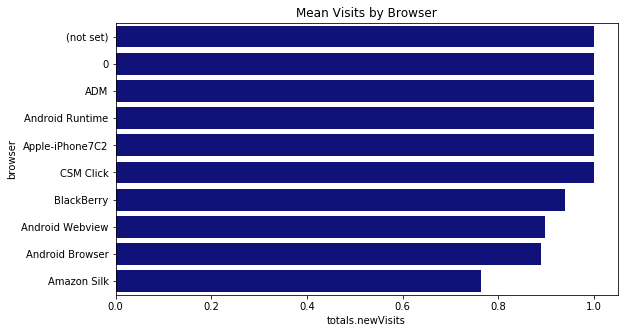

In [88]:
# Group and plot revenue
def group_visits(group_col, title, sum_values=True, color = 'darkred', size=(8,5)):
    if sum_values:
        tmp = df.groupby(group_col)['totals.newVisits'].sum()[:10]
    else:
        tmp = df.groupby(group_col)['totals.newVisits'].mean()[:10]
    tmp = tmp.to_frame().reset_index().sort_values('totals.newVisits', ascending=False)
    tmp = tmp[tmp['totals.newVisits'] > 0]
    plt.figure(figsize=size)
    plt.title(title)
    ax = sns.barplot(y=tmp[group_col], x= tmp['totals.newVisits'], orient='h', color = color)

# Revenue
group_visits('medium', 'Total Visits by Medium', True, size=(9,5))
group_visits('browser', 'Mean Visits by Browser', False, 'darkblue',size=(9,5))

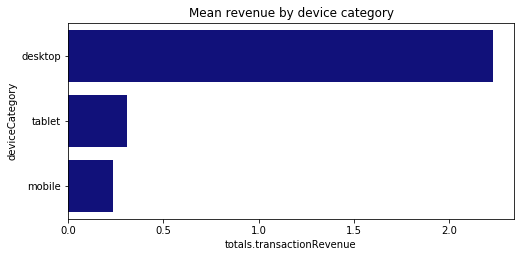

In [92]:
 #Pie chart
colors = ['darkblue', 'darkred', 'darkgreen']
dev_train = df['deviceCategory'].value_counts().to_frame().reset_index()
trace1 = go.Pie(labels=dev_train['index'], values=dev_train.deviceCategory,
                domain= {'x': [0, .48]}, marker=dict(colors=colors))
layout = dict(title= "Device category", height=400)
fig = dict(data=[trace1], layout=layout)
iplot(fig)
# Revenue
group_revenue('deviceCategory', 'Mean revenue by device category', False, 'darkblue', size=(8, 3.6))